In [38]:
#-------Import libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [39]:
num_classes = 10
img_size = (28, 28, 1)

In [40]:
#-------Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#-------Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#-------Reshape to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#-------One-hot encode labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [41]:
#-------Define the CNN model
inputs = Input(img_size)
x = Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu')(inputs)
x = Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu')(x)
x = Flatten()(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)
outputs = Dense(num_classes,activation = 'softmax')(x) 
model = Model(inputs,outputs)

In [42]:
model.summary(show_trainable = True)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_20 (InputLayer) │ (None, 28, 28, 1)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_12 (Conv2D)          │ (None, 26, 26, 8)     │         80 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_13 (Conv2D)          │ (None, 24, 24, 16)    │      1,168 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_12 (Flatten)        │ (None, 9216)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_36 (Dense)            │ (None, 64)            │    589,888 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_37 (Dense)            │ (None, 16)            │      1,040 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_38 (Dense)            │ (None, 10)            │        170 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 592,346 (2.26 MB)

 Trainable params: 592,346 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9975 - loss: 0.0067 - val_accuracy: 0.9845 - val_loss: 0.0820
Epoch 2/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9980 - loss: 0.0061 - val_accuracy: 0.9829 - val_loss: 0.0919
Epoch 3/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9858 - val_loss: 0.0807
Epoch 4/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9990 - loss: 0.0029 - val_accuracy: 0.9865 - val_loss: 0.0841
Epoch 5/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9858 - val_loss: 0.0895
Epoch 6/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9986 - loss: 0.0047 - val_accuracy: 0.9840 - val_loss: 0.1017
Epoch 7/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9843 - val_loss: 0.0995
Epoch 8/200
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9989 - loss: 0

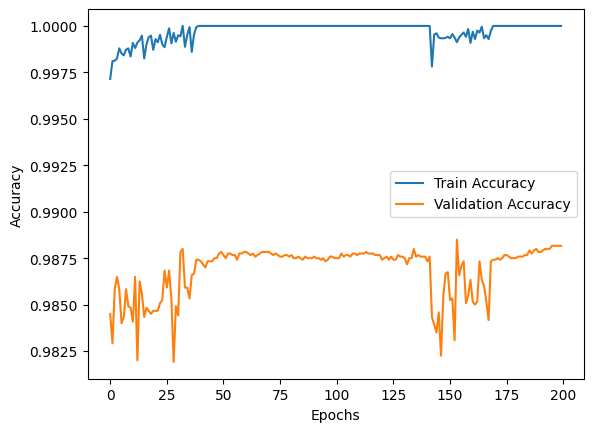

In [44]:
#-------Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#-------Train the model
history = model.fit(
    x_train, y_train,
    epochs = 200,
    batch_size = 32,
    validation_split = 0.2
)

#-------Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

#-------Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()